In [2]:
!pip install --user --upgrade --force-reinstall \
    numpy==1.26.4 \
    pandas==2.2.3 \
    scikit-learn==1.3.2 \
    matplotlib==3.7.5 \
    scipy==1.10.1 \
    xgboost==1.7.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 14.1 MB/s eta 0:00:00
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 107.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 113.9 MB/s eta 0:00:0000:010:01

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import scipy
import xgboost


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("test_dataset.csv")

cols = [
    "url_len","url_entropy","url_has_login","url_has_client","url_has_server","url_has_admin",
    "url_has_ip","url_isshorted","url_count_dot","url_count_hyphen",
    "url_count_letter","url_count_digit","tld_is_sus",
]

X = df[cols].astype(float).values
y = (df["label"]=="malicious").astype(int).values


In [3]:
import sys
import numpy as np, pandas as pd
import sklearn
import matplotlib
import scipy
import xgboost

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("Matplotlib:", matplotlib.__version__)
print("SciPy:", scipy.__version__)
print("XGBoost:", xgboost.__version__)

# confirm user site-packages is loaded first
print("\nTop of sys.path:", sys.path[:3])


NumPy: 1.26.4
Pandas: 2.2.3
scikit-learn: 1.3.2
Matplotlib: 3.7.5
SciPy: 1.10.1
XGBoost: 1.7.6

Top of sys.path: ['/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload']



=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    330199
           1       0.83      0.60      0.70     90355

    accuracy                           0.89    420554
   macro avg       0.87      0.78      0.81    420554
weighted avg       0.88      0.89      0.88    420554


=== XGBoost Report ===
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    330199
           1       0.92      0.75      0.83     90355

    accuracy                           0.93    420554
   macro avg       0.93      0.87      0.89    420554
weighted avg       0.93      0.93      0.93    420554



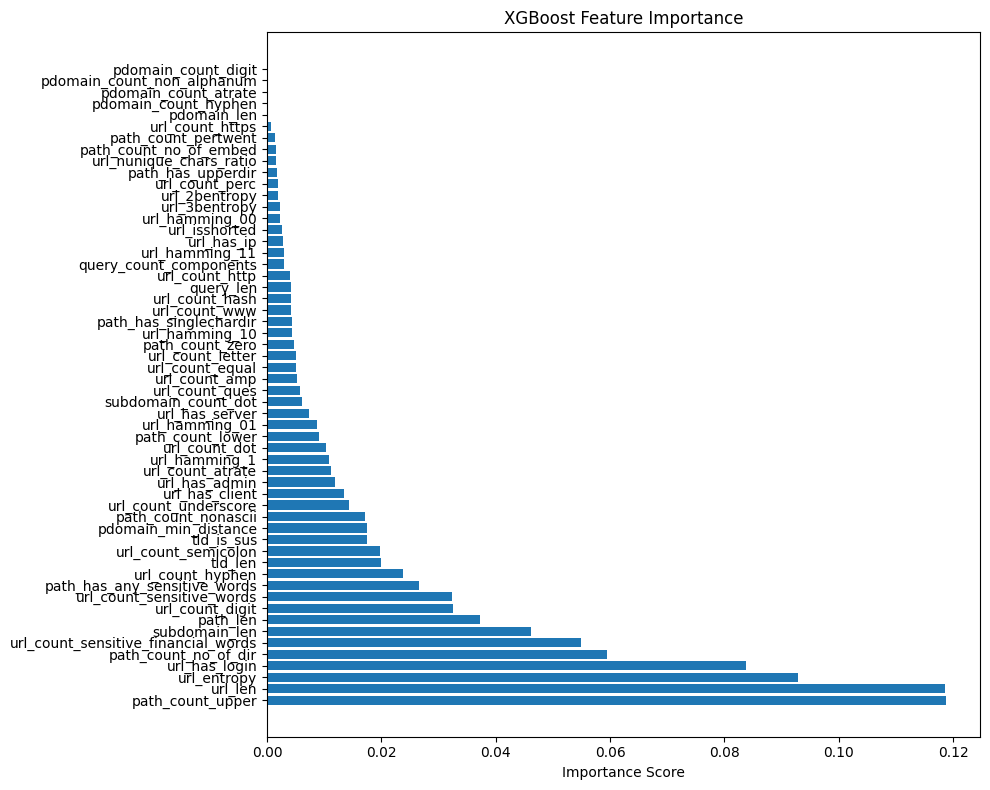

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt

# Load data

df = pd.read_csv("test_dataset.csv")

# Remove non-numeric columns

non_numeric = ["url", "source", "tld"]   # <-- these contain strings
df = df.drop(columns=non_numeric)

# Prepare features & labels

X = df.drop("label", axis=1)
y = df["label"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# scale numeric features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 1. Logistic Regression
# -------------------------
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))

# -------------------------
# 2. XGBoost Model
# -------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n=== XGBoost Report ===")
print(classification_report(y_test, y_pred_xgb))

# -------------------------
# 3. XGBoost Feature Importance Graph
# -------------------------
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(np.array(X.columns)[indices], importances[indices])
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

